In [0]:
# Description: This program uses Convolutional Neural Networks (CNN) 
#              to classify handwritten digits as numbers 0 - 9

In [0]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Get the image shape
print(X_train.shape)#60000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)
print(X_test.shape)#10000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Take a look at the first image (at index=0) in the training data set as a numpy array, This shows the image as a series of pixel values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#Print the image label
y_train[0]

5

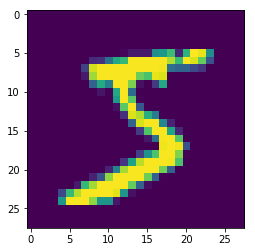

In [6]:
#Show the image as a picture
plt.imshow(X_train[0])

In [0]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#Convolution layer to extract features from the input image, and create 64 channels of ReLu 3x3 convolved features (NOTE: Rectifier Linear Unit aka (ReLu))
model.add(Conv2D(32, kernel_size=3, activation='relu'))#Convolution layer to extract features from the input image, and create 32 channels of ReLu 3x3 convolved features
model.add(Flatten())#Flattening  layer makes the image a linear array or 1D Array or 1D Vector to feed into and connect with the neural network
model.add(Dense(10, activation='softmax'))# The neural network last layer with 10 neurons and activation function softmax, 10 neurons used because we have 10 labels

In [10]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0712 17:30:11.366239 140259247986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 17:30:11.403307 140259247986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

W0712 17:31:56.019908 140259247986560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 17:31:56.088547 140259247986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 200s 3ms/step - loss: 1.4287 - acc: 0.8797 - val_loss: 0.0900 - val_acc: 0.9715
Epoch 2/3
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0659 - acc: 0.9799 - val_loss: 0.0762 - val_acc: 0.9758
Epoch 3/3
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0431 - acc: 0.9859 - val_loss: 0.0783 - val_acc: 0.9768


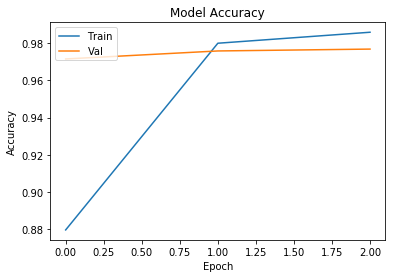

In [13]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [14]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[1.34177355e-07, 2.48542209e-09, 8.91900864e-09, 9.77532750e-07,
        6.71991271e-13, 5.89210902e-11, 6.14161825e-13, 9.99998927e-01,
        3.00458569e-09, 4.02709599e-09],
       [6.14337750e-06, 1.04692994e-07, 9.99898434e-01, 5.43854867e-06,
        4.74248252e-10, 7.02491190e-11, 8.21188223e-05, 1.48188725e-10,
        7.57780845e-06, 1.40203557e-10],
       [2.35221000e-06, 9.98755455e-01, 5.15569263e-06, 1.32248923e-09,
        8.23073151e-06, 4.68670260e-06, 1.06355637e-05, 5.41945262e-08,
        1.21341727e-03, 6.27768459e-09],
       [9.99935389e-01, 4.53953021e-11, 1.37671577e-07, 1.21291833e-12,
        2.59405852e-09, 1.30445734e-08, 6.43264575e-05, 4.99175978e-11,
        6.86783475e-09, 1.68532097e-07]], dtype=float32)

In [15]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


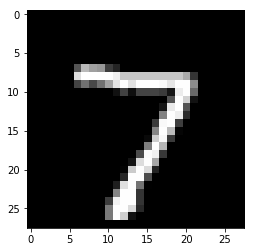

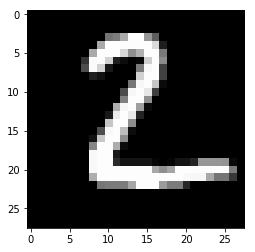

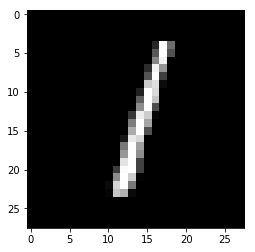

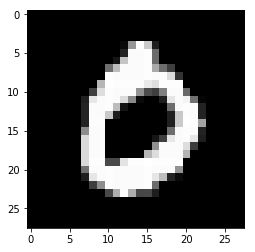

In [17]:
#Show the first 4 images as pictures
for i in range(0,4):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()